In [1]:
#07/09//2019 3.hafta cts
#ols regression
import statsmodels.formula.api as smf
import os
os.getcwd()

'C:\\Users\\asus1'

In [3]:
os.chdir('C:/Users/asus1/Desktop/bootcamp/dersler/hafta3')
os.getcwd()

'C:\\Users\\asus1\\Desktop\\bootcamp\\dersler\\hafta3'

In [4]:
import pandas as pd
ad=pd.read_csv('Advertising.csv',usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
#herhangi null bi değişken var mı yok mu
df.isnull().values.any()

False

In [10]:
#korelasyon iişkisine bakıyoruz, 1 e ne kadar yakınsa o kadar güçlü bir ilişki vardır
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [11]:
import seaborn as sns

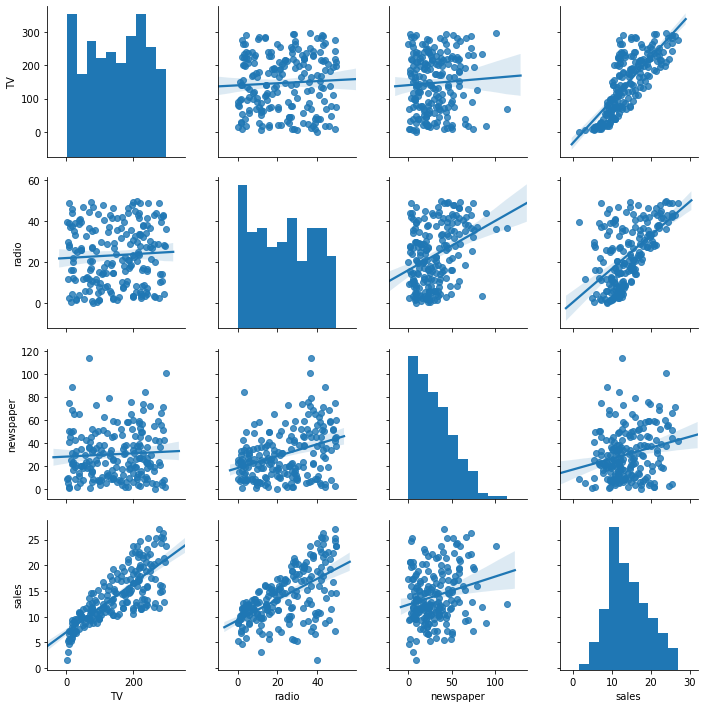

In [13]:
sns.pairplot(df,kind="reg")  ###fit linear regression
#en alttaki satır olan satışla başlayalım,satışla Tv arasında bir lineer ilişi olduğu açık
##mesela radio ile sales arasında çok bir alaka yok doğruda açı bile yok

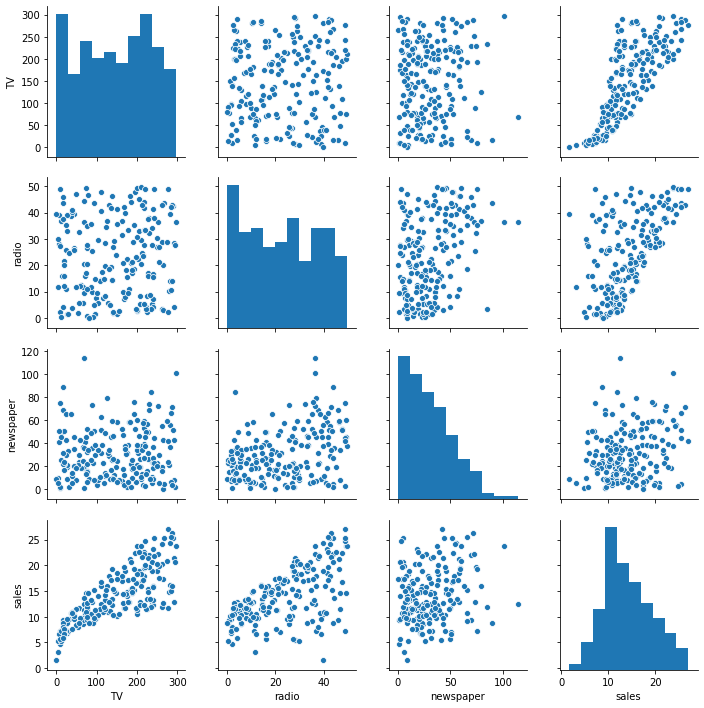

In [14]:
sns.pairplot(df,kind="scatter")
#regresyon olmadan yalnızca scatter plot çizimi

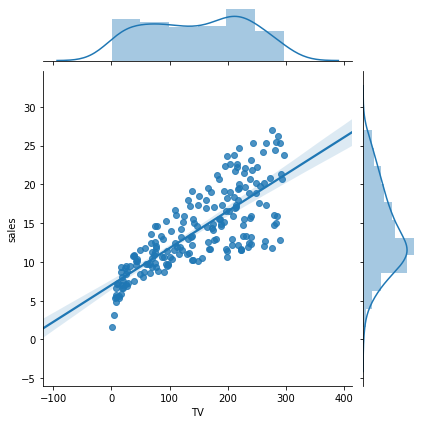

In [15]:
sns.jointplot(x="TV", y="sales",data=df, kind="reg")
#tvnin dağılımı, salesin dağılımlarını da çiziyor

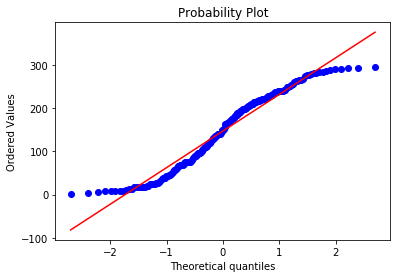

In [16]:
import scipy.stats as stats
import pylab
stats.probplot(df["TV"], dist="norm",plot=pylab) 
pylab.show()
#TV normal mi değil mi ona baktık, olmadığını gördük

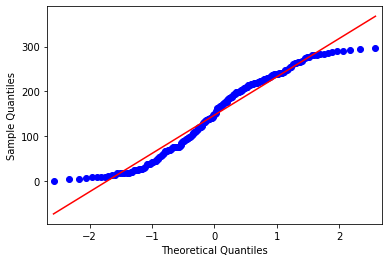

In [18]:
import statsmodels.api as sm
sm.qqplot(df["TV"], line = 's')
pylab.show()


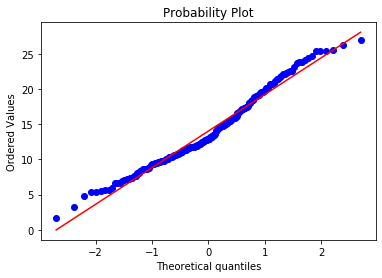

In [19]:
import scipy.stats as stats
import pylab
stats.probplot(df["sales"], dist="norm",plot=pylab) 
pylab.show()
#sales daha normale yakın

In [20]:
import statsmodels.api as sm
X = df[["TV"]] #double p
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [22]:
X=sm.add_constant(X)  #Xin yanına onun size ı kadar ekliyoruz.constantları eklemek gerekir
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [24]:
y = df["sales"] #double p
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [26]:
lm = sm.OLS(y,X)  #satışları(salesleri) X ile modelle diyoruz, model kurduk
model = lm.fit()
model.summary()

#çıkan pvaluelar alfadan küçük, yani verim benim için anlamlı
#tahmini_sales=7.03 + 0.04TV + error value
#coefde yazan ilki B0(constant),B1.. diye devam ediyor
#prob(fstatistic) çok küçük kalmış anlamlı değişken olduğunu gösteriyor zaten
#R_squared 1e ne kadar yakınsa modelimin daha doğru olduğunu gösteriyor,0.95 gibi bir değer çıkmışsa da diğer testlerden de emin olmak lazım

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        14:11:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#bir şeyin bir şeye etkisinin nasıl olduğunu görmek için formula ile yapıyoruz,sales ı TV lerler açıklamaya çalışıyorum
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df)
model=lm.fit()
model.summary()
#parametreleri çekti B0 ve B1 i çektik
model.params
model.summary().tables[1]
#güven aralığını söylüyor
model.conf_int()


,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [33]:
model.f_pvalue
print("f_pvalue :","%.4f" % model.f_pvalue)
print("fvalue :","%.2f" % model.fvalue)
print("tvalue :","%.2f" % model.tvalues[0:1])

f_pvalue : 0.0000
fvalue : 312.14
tvalue : 15.36


In [34]:
model.rsquared_adj


0.6099148238341623

In [35]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [36]:
y[0:5]
print("Sales =" + str("%.2f" % model.params[0])+ "+TV" + "*"+ str("%.2f" % model.params[1]))

Sales =7.03+TV*0.05


Text(0, 0.5, 'Satış Sayısı')

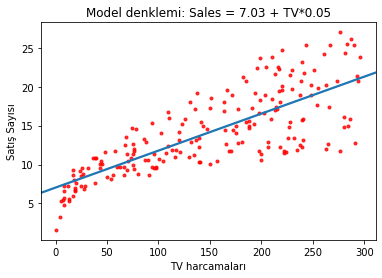

In [38]:
g = sns.regplot(df["TV"],df["sales"],ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model denklemi: Sales = 7.03 + TV*0.05")
g.set_xlabel("TV harcamaları")
g.set_ylabel("Satış Sayısı")

In [40]:
from sklearn.linear_model import LinearRegression

In [48]:
x = df[["TV"]]
y = df["sales"]
reg=LinearRegression()
#ben x im ile y yi açıklıycam
model=reg.fit(x,y)
model.intercept_


7.032593549127693

In [44]:
model.coef_

array([0.04753664])

In [49]:
model.score(x,y)
#modelin iyiliğini gösteriyor

0.611875050850071

In [51]:
#x in modeldeki tahminlerini bana getir
model.predict(x)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [55]:
## 30 değeri için modelim bana ne üretecek onu buluyorum
model.predict([[30]])

array([8.45869276])

In [56]:
## verdiğim belirli değerler için modelim ne üretecek
yeni_veri= [[5],[90],[200]]
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
lm=smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()
##çoklu modelleri karşılaştırmak için de kullanılabilir, hata oranının ben daha düşük olmasını isterim
mse=mean_squared_error(y,model.fittedvalues)  #gerçek ylerim ile fitted değerleri ölçüyoruz
mse


10.512652915656757

In [58]:
import numpy as np
rmse=np.sqrt(mse)
rmse

3.2423221486546887

In [59]:
reg.predict(x)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [60]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [61]:
k_t = pd.DataFrame({"gercek_y":y[0:10], "tahmin_y":reg.predict(x)[0:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [62]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [64]:
##enküçük kareler yöntemini kendimiz yapıyoruz şimdi
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [65]:
np.sum(k_t["hata_kare"])
np.mean(k_t["hata_kare"])
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996776

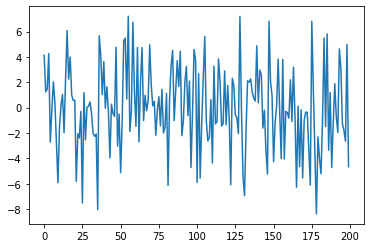

In [69]:
import matplotlib.pyplot as plt
model.resid[0:10]
plt.plot(model.resid)

In [70]:
##08/09/2019
import pandas as pd
ad = pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [71]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [73]:
#salesı predict etmeye çalışıyorum, data setimden sales hariç olanları al diyorum,diğer üçüyle salesi tahmin edicem
X=df.drop("sales",axis=1)
y=df["sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape


(160, 3)

In [74]:
y_train.shape

(160,)

In [75]:
print(X_test.shape)
print(y_test.shape)
training=y.copy()
training.head()

(40, 3)
(40,)


0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [76]:
#ytraini xler ile açıklıycam
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

#yorumlayalım, hepsinin pvaluesi 0.05den küçük yani anlamlı değişkenler benim için
#TAHMİNİ_sales=0.0531TV + 0.2188RADIO + 0.0239NEWSPAPER çıkıyor
## Rsquared çok yüksek

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sun, 08 Sep 2019   Prob (F-statistic):                   1.28e-137
Time:                        12:50:08   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#detect outliers, errorların outlierlarını detect ediyoruz aslında, datanın değil, çünkü biz errorunda normal dağılımdan geldiğini kabul ediyoruz ya
influence=model.get_influence()
influence

In [82]:
resid_student = influence.resid_studentized_external
(cooks,p) = influence.cooks_distance
(dffits,p) = influence.dffits
leverage= influence.hat_matrix_diag


In [83]:
import seaborn as sns

Leverage vs. Studentized Residuals


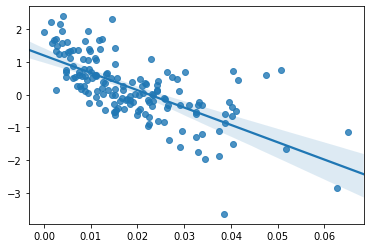

In [86]:
print("Leverage vs. Studentized Residuals")
##çizdirip bakıyoruz,modeldeki residualların dağılımına,ayrık uzak residuallar var, outlier var, diyorumki ya normal dağılımdan gelmiyor ya da constanst varyans olmayabilir, şimdi test edicez bunu belkide modeli pek etkileyecek seviyede değildir
##leverage bizim verilerimizden gelen,pearson ise modelden gelen
sns.regplot(leverage, model.resid_pearson, fit_reg=True)  #True olursa regresyon çizgisini de çizer, line fit eder


In [91]:
advres=pd.concat([ad, pd.Series(model.resid , name="resid"),
                 pd.Series(model.predict(), name="predict")],axis=1)

model.predict()
advres.head()


,TV,radio,newspaper,sales,resid,predict
0,230.1,37.8,69.2,22.1,-0.041335,8.396375
1,44.5,39.3,45.1,10.4,-1.637545,11.587710
2,17.2,45.9,69.3,9.3,-3.308953,8.967927
3,151.5,41.3,58.5,18.5,0.022542,6.501963
4,180.8,10.8,58.4,12.9,-0.458176,12.793680


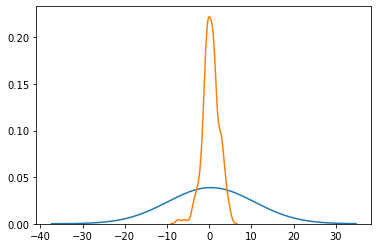

In [90]:
#model.resid
sns.kdeplot(np.array(advres.resid),bw=10)
sns.distplot(np.array(advres.resid),hist=False)
##kırmızı olan residualların dağılımı

C:\Users\asus1\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\asus1\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\asus1\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


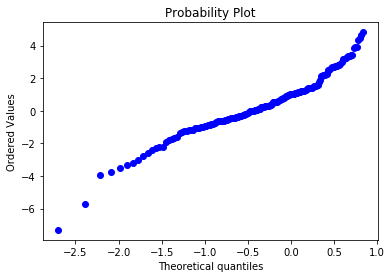

In [92]:
#probability plotunu çizdirelim,beklenen line fit etmiş olması
import pylab
stats.probplot(advres.resid, dist="norm",plot=pylab)
pylab.show()

In [98]:
##shapiro yapalım residuallara,advres datasında nan değerler geldi o yüzden dropna() yapmamız gerekir, eğitim datasındaki noneları kaldırmak için

from scipy.stats import shapiro
advres=advres.dropna()
stat,p=shapiro(advres.resid)
print(stat,p)
alpha=0.05
if p > alpha:
    print("Hatalar normal dağılımdan geliyor (Fail to reject H0)")
else:
    print("Hatalar normal dağılımdan gelmemektedir (Reject H0)")
    

0.9722059965133667 0.010207269340753555
Hatalar normal dağılımdan gelmemektedir (Reject H0)


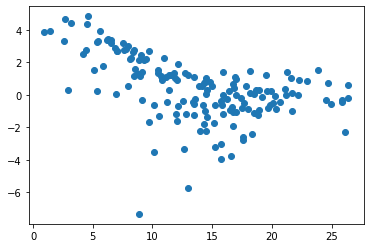

In [99]:
resid=model.resid
plt.scatter(model.predict(),resid)
##residuallarımızın scatter plot dağılımına baktık, rastgele dağılmıyor değişik bir patterne sahip

In [101]:
#regresyon modeli oluşturma, farklı kütüphaneden,yine salesı predict edicem
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
#df,full olan datam
lm=smf.ols("sales ~ TV+newspaper+radio",df).fit()
lm.summary()
##yorum:pvalueya bakıldığında newspaper datası veriyi açıklamak için anlamsız oldu(newspaperin betası=0),Fstat oldukça küçük, en az bir tanesi farklı olduğunu gösteriyor yani
##intercept dediğimiz constantımız

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           1.58e-96
Time:                        14:13:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
y,X = dmatrices("sales ~ TV+newspaper+radio",data=df,return_type="dataframe")
y
X
##multicolonaritye bakıyoruz
##Xlerden herhangi biri 10'dan büyükse multicolonarity problemi var yani x diğerleriyle corrale denir
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif


[6.848899953334954, 1.0046107849396502, 1.1451873787239288, 1.1449519171055353]

In [114]:
##aynısını scikit learn ile kurucaz,farklı model
lm=LinearRegression()
model=lm.fit(X_train,y_train)
model.intercept_


2.979067338122629

In [115]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [116]:
#model denklemi ; sales=2.97+TV0.04+RADIO0.18+0.002NEWSPAPER
lm=LinearRegression()

In [117]:
model=lm.fit(X_train,y_train)
print(model.intercept_)
model.coef_

2.979067338122629


array([0.04472952, 0.18919505, 0.00276111])

In [118]:
####örneğin 30 birim TV, 10 tne radyo, 40 tane newspaper için salesi bul
yeni_veri=[[30],[10],[40]]
yeni_veri=pd.DataFrame(yeni_veri).T
model.predict(yeni_veri)

array([6.32334798])

In [121]:
###rmse değerlerini karşılaştırdık, istediğim test ile modelin rmse'nin yakın çıkması, yakın olması modelin iyi olduğu anlamına gelir
from sklearn.metrics import mean_squared_error,r2_score
rmse=np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(rmse)
testrmse=np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(testrmse)

1.644727765644337
1.7815996615334502


In [125]:
model.score(X_train, y_train)
cross_val_score(model, X_train, y_train, cv=10,scoring="r2").mean()
trainmse=np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()
print(trainmse)
testmse=np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")).mean()
print(testmse)

1.6513523730313335
1.8462778823997095


In [135]:
###PCR'a geçiyoruz
import pandas as pd
hit=pd.read_csv('Hitters.csv')
df=hit.copy()
df=df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [141]:
##dummy yaratıyoruz
import pandas as pd
dms=pd.get_dummies(df[['League','Division', 'NewLeague']])
dms.head()


,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [142]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X_.head()
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [144]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [145]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_train",y_test.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_train (66,)


In [148]:
training=df.copy()
print("training",training.shape)

training (263, 20)


In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA()

In [150]:
###bağımsız değişkenlerime göre bana pca fit et diyorum yani Xlerime göre
X_reduced_train=pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [155]:
#bunlar benim transform olmuş xlerim, gerçek xlerim değil
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [156]:
##şimdi modeli kurduk,trainlerle fit edelim,xleri ylerler eğit
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)

In [157]:
pcr_model.intercept_

543.4834416243655

In [158]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [160]:
##şu an train için tahmin et
y_pred=pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])